In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [2]:
df = pd.read_csv('The Ultimate Cars Dataset 2024.csv', encoding='ISO-8859-1')
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1213 non-null   object
 1   Cars Names                 1213 non-null   object
 2   Engines                    1213 non-null   object
 3   CC/Battery Capacity        1210 non-null   object
 4   HorsePower                 1213 non-null   object
 5   Total Speed                1213 non-null   object
 6   Performance(0 - 100 )KM/H  1207 non-null   object
 7   Cars Prices                1213 non-null   object
 8   Fuel Types                 1213 non-null   object
 9   Seats                      1213 non-null   object
 10  Torque                     1212 non-null   object
dtypes: object(11)
memory usage: 104.4+ KB


In [4]:
df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

In [5]:
df.columns

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque'],
      dtype='object')

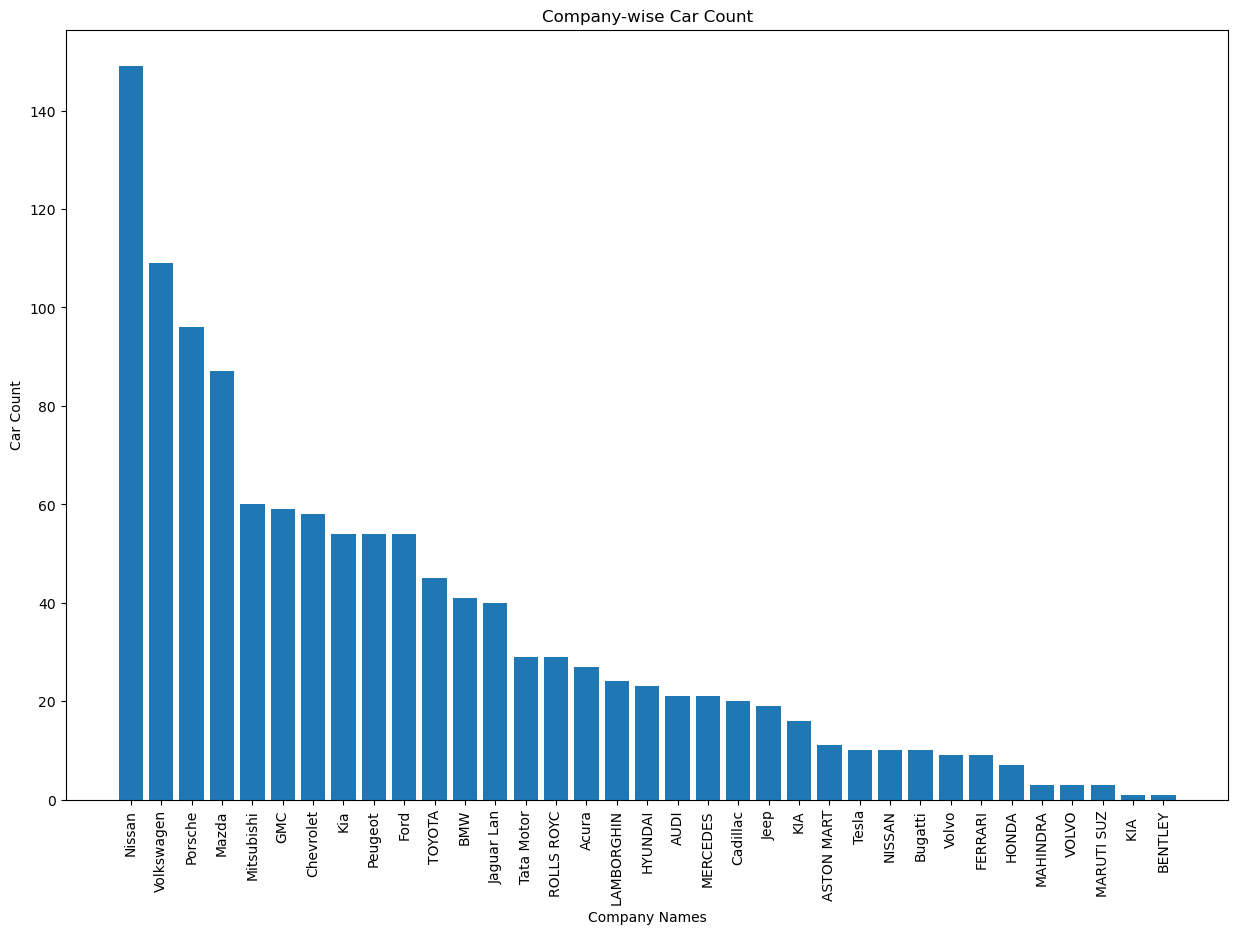

In [6]:
company_count = df['Company Names'].value_counts()


plt.figure(figsize=(15,10))
plt.bar(company_count.index.str[:10], company_count.values)
plt.xlabel('Company Names')
plt.ylabel('Car Count')
plt.title('Company-wise Car Count')
plt.xticks(rotation=90)
plt.show()

In [7]:
numerical_features = ['CC/Battery Capacity', 'HorsePower', 'Total Speed', 
                      'Performance(0 - 100 )KM/H', 'Cars Prices', 'Seats', 'Torque']

In [8]:
df = pd.get_dummies(df, columns=['Fuel Types', 'Engines', 'Company Names', 'Cars Names'])
df.head()

,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque,Fuel Types_CNG/Petrol,Fuel Types_Diesel,Fuel Types_Diesel Hybrid,...,Cars Names_Z (Fairlady Z),Cars Names_Z PROTO,Cars Names_Zest,Cars Names_e-2008,Cars Names_e-2008 GT,Cars Names_e-208,Cars Names_eK Space,Cars Names_eK X,Cars Names_i (Kei Car),Cars Names_i-MiEV (Electric)
0,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",2,800 Nm,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",5,900 Nm,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",5,100 - 140 Nm,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",4,900 Nm,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",2,560 Nm,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
def extract_numeric(value):
    result = re.findall(r'\d+', str(value))
    if result:
        return float(result[0])
    return np.nan

In [10]:
df['Total Speed'] = df['Total Speed'].apply(extract_numeric)
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(extract_numeric)
df['Torque'] = df['Torque'].apply(extract_numeric)
df['CC/Battery Capacity'] = df['CC/Battery Capacity'].apply(extract_numeric)
df['HorsePower'] = df['HorsePower'].apply(extract_numeric)
df['Seats'] = df['Seats'].apply(extract_numeric)
df['Cars Prices'] = df['Cars Prices'].str.replace('$', '').str.replace(',', '')
df['Cars Prices'] = pd.to_numeric(df['Cars Prices'], errors='coerce')
df = df.dropna()
df.head()

,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque,Fuel Types_CNG/Petrol,Fuel Types_Diesel,Fuel Types_Diesel Hybrid,...,Cars Names_Z (Fairlady Z),Cars Names_Z PROTO,Cars Names_Zest,Cars Names_e-2008,Cars Names_e-2008 GT,Cars Names_e-208,Cars Names_eK Space,Cars Names_eK X,Cars Names_i (Kei Car),Cars Names_i-MiEV (Electric)
0,3990.0,963.0,340.0,2.0,1100000.0,2.0,800.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6749.0,563.0,250.0,5.0,460000.0,5.0,900.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.0,630.0,250.0,3.0,161000.0,4.0,900.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5.0,602.0,320.0,3.0,253290.0,2.0,560.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3.0,710.0,341.0,2.0,499000.0,2.0,770.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Кластеризация по характеристикам производительности 

In [11]:
performance_features = ['HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Torque']

In [12]:
df_performance = df[performance_features]

In [13]:
scaler = StandardScaler()
df_performance_scaled = scaler.fit_transform(df_performance)

In [14]:
kmeans_performance = KMeans(n_clusters=4, n_init = 'auto', random_state=42)
df['Cluster_Performance'] = kmeans_performance.fit_predict(df_performance_scaled)

In [15]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_performance_scaled)

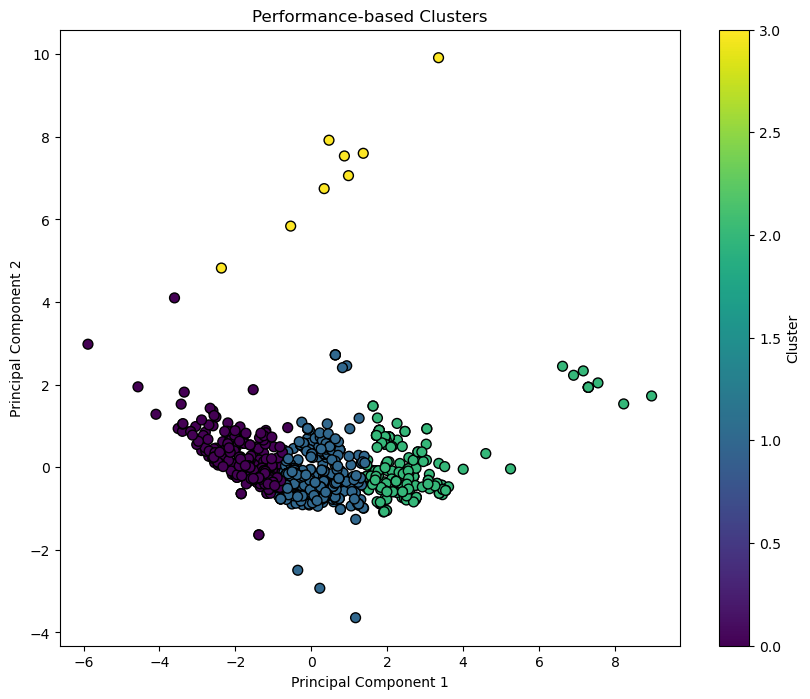

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster_Performance'], cmap='viridis', edgecolor='k', s=50)
plt.title('Performance-based Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [17]:
# Анализ статистик кластеров
df.groupby('Cluster_Performance')[performance_features].mean()

,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Torque
Cluster_Performance,,,,
0,144.057637,180.296830,9.913545,245.219020
1,314.561224,223.008163,5.759184,447.100000
2,648.274611,301.958549,3.113990,780.284974
3,491.250000,110.000000,16.375000,2337.500000


### Кластер 0
Мощность — 144.1 л.с., скорость — 180.3 км/ч, разгон до 100 км/ч за 9.91 секунд, крутящий момент — 245.2 Н·м. Это стандартные автомобили среднего класса.
### Кластер 1
Мощность — 314.6 л.с., скорость — 223 км/ч, разгон до 100 км/ч за 5.76 секунд, крутящий момент — 447.1 Н·м. Спортивные автомобили с хорошими характеристиками.
### Кластер 2
Мощность — 648.3 л.с., скорость — 301.9 км/ч, разгон до 100 км/ч за 3.11 секунд, крутящий момент — 780.3 Н·м. Очень мощные автомобили, спортивные и люксовые.
### Кластер 3
Мощность — 491.3 л.с., скорость — 110 км/ч, разгон до 100 км/ч за 16.4 секунд, крутящий момент — 2337.5 Н·м. Это очень необычный кластер с автомобилями с большим крутящим моментом, но с низкой максимальной скоростью и долгим временем разгона, что может означать, что это специализированные автомобили, например, для тяжелых условий эксплуатации (внедорожники, грузовики).

# Кластеризация по типу топлива и типу двигателя

In [18]:
df_fuel_engine = df[['CC/Battery Capacity', 'Torque'] + list(df.filter(like='Fuel Types', axis=1).columns) + list(df.filter(like='Engines', axis=1).columns)]

In [19]:
kmeans_fuel_engine = KMeans(n_clusters=4, n_init = 'auto', random_state=42)
df['Cluster_Fuel_Engine'] = kmeans_fuel_engine.fit_predict(df_fuel_engine)

In [20]:
pca_fuel_engine = PCA(n_components=2)
pca_components_fuel_engine = pca_fuel_engine.fit_transform(df_fuel_engine)

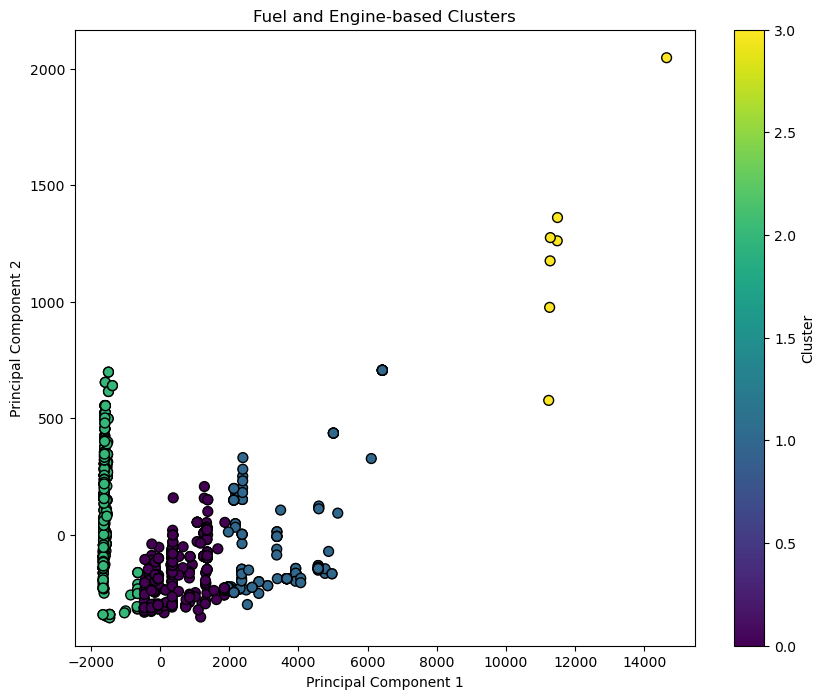

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_components_fuel_engine[:, 0], pca_components_fuel_engine[:, 1], c=df['Cluster_Fuel_Engine'], cmap='viridis', edgecolor='k', s=50)
plt.title('Fuel and Engine-based Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [22]:
df.groupby('Cluster_Fuel_Engine')[['CC/Battery Capacity', 'Torque']].mean()

,CC/Battery Capacity,Torque
Cluster_Fuel_Engine,,
0,2112.397790,323.033149
1,5010.734568,648.370370
2,47.883629,461.520710
3,13328.571429,2500.000000


### Кластер 0 
Емкость двигателя — 2112.4 см³, крутящий момент — 323 Н·м. Это может быть автомобиль с стандартным двигателем.
### Кластер 1
Емкость двигателя — 5010.7 см³, крутящий момент — 648.4 Н·м. Автомобили с более мощными двигателями.
### Кластер 2
Емкость двигателя — 47.9 см³, крутящий момент — 461.5 Н·м. Это могут быть автомобили с малым двигателем, возможно гибриды или электрические автомобили с высоким крутящим моментом.
### Кластер 3
Емкость двигателя — 13,328.6 см³, крутящий момент — 2500 Н·м. Эти автомобили, вероятно, используют очень большие двигатели и могут быть предназначены для серьезных нагрузок или автомобилей класса люкс.

# Кластеризация по потребительским предпочтениям

In [23]:
consumer_preference_features = ['Cars Prices', 'Seats', 'HorsePower', 'Torque']

In [24]:
df_consumer_preferences = df[consumer_preference_features]
df_consumer_preferences_scaled = scaler.fit_transform(df_consumer_preferences)

In [25]:
kmeans_consumer_preferences = KMeans(n_clusters=4, n_init = 'auto', random_state=42)
df['Cluster_Consumer_Preference'] = kmeans_consumer_preferences.fit_predict(df_consumer_preferences_scaled)

In [26]:
pca_consumer_preferences = PCA(n_components=2)
pca_components_consumer_preferences = pca_consumer_preferences.fit_transform(df_consumer_preferences_scaled)

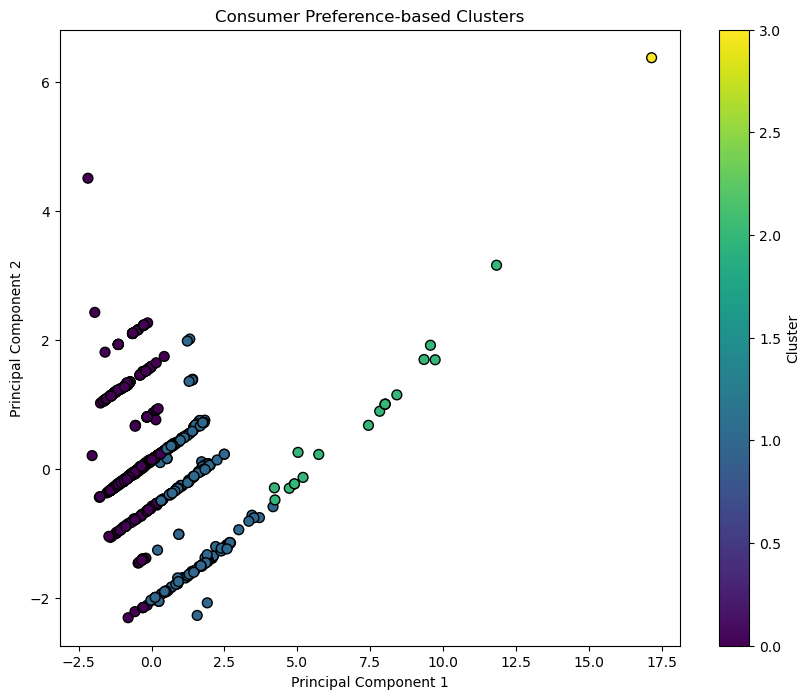

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_components_consumer_preferences[:, 0], pca_components_consumer_preferences[:, 1], c=df['Cluster_Consumer_Preference'], cmap='viridis', edgecolor='k', s=50)
plt.title('Consumer Preference-based Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [28]:
df.groupby('Cluster_Consumer_Preference')[consumer_preference_features].mean()

,Cars Prices,Seats,HorsePower,Torque
Cluster_Consumer_Preference,,,,
0,4.096376e+04,5.328786,221.739427,336.929059
1,1.987450e+05,3.636364,521.000000,673.027972
2,2.885278e+06,2.000000,1118.277778,1800.555556
3,1.800000e+07,2.000000,1500.000000,1600.000000


### Кластер 0 
Средняя цена — 40,963, мощность — 221.7 л.с., крутящий момент — 336.9 Н·м. Это может быть, например, средний сегмент автомобилей с хорошим балансом между ценой и мощностью.
### Кластер 1
Средняя цена — 198,745, мощность — 521 л.с., крутящий момент — 673.0 Н·м. Это скорее всего автомобили более высокого класса с большим двигателем.
### Кластер 2
Средняя цена — 2,885,278, мощность — 1118 л.с., крутящий момент — 1800.6 Н·м. Здесь видим супер- или гипер-автомобили с очень высокой мощностью и ценой.
### Кластер 3
Средняя цена — 18,000,000, мощность — 1500 л.с., крутящий момент — 1600 Н·м. Это, вероятно, ультра-люксовые или специально сконструированные автомобили с очень высокой мощностью и ценой.